In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:

import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1sRuV2_o399bVaMUajLVXINkZoE1bD8Gk'
output_rar = '/content/Train_Augumented_Dataset_Leguminosae_3C_Dataset.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

Downloading...
From (original): https://drive.google.com/uc?id=1sRuV2_o399bVaMUajLVXINkZoE1bD8Gk
From (redirected): https://drive.google.com/uc?id=1sRuV2_o399bVaMUajLVXINkZoE1bD8Gk&confirm=t&uuid=f0641774-0678-4f88-be50-c755e856fd73
To: /content/Train_Augumented_Dataset_Leguminosae_3C_Dataset.rar
100%|██████████| 96.7M/96.7M [00:00<00:00, 101MB/s] 


In [4]:
# Path to the extracted dataset folder
dataset = '/content/Train_Augumented_Dataset_Leguminosae_3C_Dataset'

In [5]:
#AlexNet

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

def alexnet(input_shape=(224, 224, 3), num_classes=4):
    inputs = Input(shape=input_shape)

    # 1st Convolutional Layer
    x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # 2nd Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # 3rd Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # 4th Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # 5th Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Flatten the output of the last convolutional layer
    x = Flatten()(x)

    # 1st Fully Connected Layer
    x = Dense(4096)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    # 2nd Fully Connected Layer
    x = Dense(4096)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Build Model
    alexnet_model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return alexnet_model

# Example: Building and summarizing the AlexNet model
model = alexnet(input_shape=(224, 224, 3), num_classes=4)  # For example, 4 classes
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 54, 54, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │              

 Total params: 46,801,668 (178.53 MB)

 Trainable params: 46,782,532 (178.46 MB)

 Non-trainable params: 19,136 (74.75 KB)

Found 3726 images belonging to 4 classes.
Found 87 images belonging to 4 classes.
Found 181 images belonging to 4 classes.
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 37s 150ms/step - accuracy: 0.6240 - loss: 1.0637 - val_accuracy: 0.2529 - val_loss: 2.4021
Epoch 2/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.8147 - loss: 0.5116 - val_accuracy: 0.2529 - val_loss: 17.6780
Epoch 3/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.8730 - loss: 0.3588 - val_accuracy: 0.2644 - val_loss: 11.3597
Epoch 4/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.8957 - loss: 0.2748 - val_accuracy: 0.4368 - val_loss: 4.7839
Epoch 5/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9180 - loss: 0.2361 - val_accuracy: 0.6092 - val_loss: 2.4780
Epoch 6/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9400 - loss: 0.1845 - val_accuracy: 0.5057 - val_loss: 1.9217
Epoch 7/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9422 - loss: 0.1681 - val_accuracy: 0.7931 - val_loss: 0.8169
Epoch 8/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9529 - loss: 0.1529 - val_accuracy

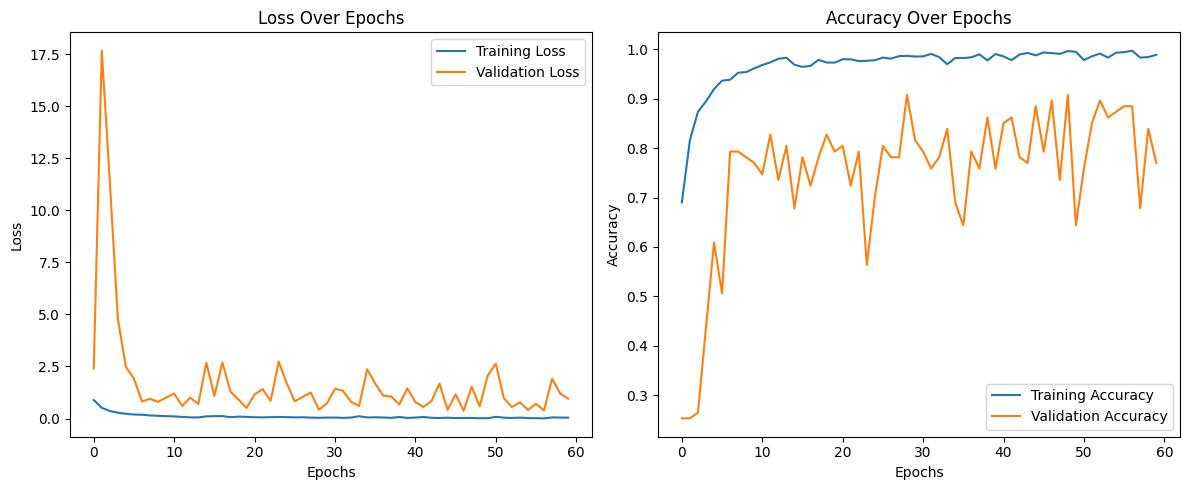

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step

Performance on Test Data [Using Alex_Net-ReLu]
Precision: 0.8458504367640577
Recall: 0.7900552486187845
F1 Score: 0.7907194676022824
Accuracy: 0.7900552486187845
Confusion Matrix:
                      Acacia_Modesta  Albizia_Lebbeck  Bauhinia_Variegatav  \
Acacia_Modesta                   42                1                    0   
Albizia_Lebbeck                  19               22                    0   
Bauhinia_Variegatav               5                0                   38   
Unknown                           6                0                    1   

                     Unknown  
Acacia_Modesta             2  
Albizia_Lebbeck            2  
Bauhinia_Variegatav        2  
Unknown                   41  


In [6]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add,
    GlobalAveragePooling2D, Flatten, Dense
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Directory for the dataset
data_dir = dataset

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=60, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Acacia_Modesta', 'Albizia_Lebbeck', 'Bauhinia_Variegatav', 'Unknown'], title="Performance on Test Data [Using Alex_Net-ReLu]")
